<a href="https://colab.research.google.com/github/liuxin96315/c36_group2_xgboost/blob/master/XGBoost_4_parameters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import xgboost
import xgboost as xgb
import statistics
# First XGBoost model for Pima Indians dataset
from numpy import loadtxt
from xgboost.sklearn import XGBRegressor
import numpy as np
from sklearn.model_selection import train_test_split,cross_validate

from sklearn import  metrics
from sklearn.model_selection import GridSearchCV  

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


from google.colab import drive
import pandas as pd
import csv
# connect drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# load data
dataset_tr = pd.read_csv('/content/drive/My Drive/capstone/data/part_zone_3month.csv')
dataset_te = pd.read_csv('/content/drive/My Drive/capstone/data/2019_combine.csv')

#train = pd.read_csv('/content/drive/My Drive/capstone/data/part_zone_3month.csv')
#test = pd.read_csv('/content/drive/My Drive/capstone/data/2019_combine.csv')

train=dataset_tr.sample(frac=1.0)
test=dataset_te.sample(frac=1.0)
x_train=train.loc[:,['month','day','hour','minute','weekday','LocationID','longitude','latitude']]
y_train=train.loc[:,['15_demand']]
x_test=test.loc[:,['month','day','hour','minute','weekday','LocationID','longitude','latitude']]
y_test=test.loc[:,['15_demand']]



In [10]:
model = xgb.XGBRegressor(objective= 'reg:linear', 
                        learning_rate= 0.4, #35//2.85
                        max_depth= 19, 
                        min_child_weight=7, 
                        gamma=1, 
                        n_estimators=3, #4
                        subsample=0.5, 
                        colsample_bytree=1
                        )


# fit model no training data
model.fit(x_train, y_train)

# make predictions for test data
y_pred = model.predict(x_test)
#predictions = [ value for value in y_pred[:]]
y_t=[v for v in y_test['15_demand']]  


mae = mean_absolute_error(y_t, y_pred)
print('Test Mean Absolute Error: %.2f' % (mae))

mse = mean_squared_error(y_t, y_pred)
print("Test Mean Square Error: %f" % (mse))


[02:41:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:41:50] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
Test Mean Absolute Error: 2.83
Test Mean Square Error: 39.662220


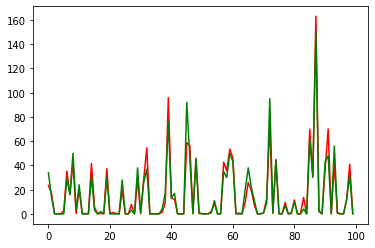

In [21]:
plt.plot(range(100),y_pred[0:100], c='r')
plt.plot(range(100),y_t[0:100], c='g')
plt.show()

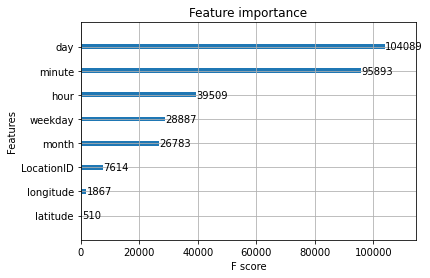

In [7]:
import matplotlib.pyplot as plt
xgb.plot_importance(model)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

In [0]:
#e_estimators

model = xgb.XGBRegressor(objective= 'reg:linear', learning_rate= 0.1, n_estimators=500)  
   
model.fit(x_train, y_train, 
        eval_set=[(x_train, y_train), (x_test, y_test)], 
        eval_metric='mae', 
        early_stopping_rounds=10, 
        verbose=True )     
evals_result = model.evals_result()    

[11:34:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-mae:14.1859	validation_1-mae:10.9058
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 10 rounds.
[1]	validation_0-mae:13.2718	validation_1-mae:10.077
[2]	validation_0-mae:12.472	validation_1-mae:9.37755
[3]	validation_0-mae:11.8037	validation_1-mae:8.83404
[4]	validation_0-mae:11.2889	validation_1-mae:8.44771
[5]	validation_0-mae:10.9332	validation_1-mae:8.22251
[6]	validation_0-mae:10.5627	validation_1-mae:7.99577
[7]	validation_0-mae:10.2983	validation_1-mae:7.8662
[8]	validation_0-mae:10.0613	validation_1-mae:7.76418
[9]	validation_0-mae:9.91545	validation_1-mae:7.74185
[10]	validation_0-mae:9.78052	validation_1-mae:7.72814
[11]	validation_0-mae:9.65182	validation_1-mae:7.70544
[12]	validation_0-mae:9.59165	validation_1-mae:7.74434
[13]	validatio

In [4]:
#max_depth & min_child_weight

param_test={'max_depth': [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24], 'min_child_weight':[1,2,3,4,5,6,7]}

parameters={'objective': 'reg:linear', 
            'learning_rate': 0.1, 
            'n_estimators': 11
            }

model = xgb.XGBRegressor(**parameters)
xgb_grid = GridSearchCV(estimator=model, param_grid=param_test)
xgb_grid.fit(x_train, y_train) 

xgb_grid.best_score_, xgb_grid.best_params_   

[02:07:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:07:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:07:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:07:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:07:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:07:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:07:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:07:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

(0.8111318940934286, {'max_depth': 19, 'min_child_weight': 7})

In [20]:
#e_estimators

model = xgb.XGBRegressor(objective= 'reg:linear', learning_rate= 0.1, max_depth= 19, min_child_weight=7, n_estimators=500)  
   
model.fit(x_train, y_train, 
        eval_set=[(x_train, y_train), (x_test, y_test)], 
        eval_metric='mae', 
        early_stopping_rounds=10, 
        verbose=True )     
evals_result = model.evals_result()   

[03:21:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-mae:13.7776	validation_1-mae:10.4366
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 10 rounds.
[1]	validation_0-mae:12.4342	validation_1-mae:9.13456
[2]	validation_0-mae:11.2429	validation_1-mae:7.9859
[3]	validation_0-mae:10.1739	validation_1-mae:6.97274
[4]	validation_0-mae:9.20855	validation_1-mae:6.09094
[5]	validation_0-mae:8.34763	validation_1-mae:5.33112
[6]	validation_0-mae:7.5807	validation_1-mae:4.68919
[7]	validation_0-mae:6.89544	validation_1-mae:4.15791
[8]	validation_0-mae:6.27983	validation_1-mae:3.73229
[9]	validation_0-mae:5.73515	validation_1-mae:3.40807
[10]	validation_0-mae:5.25057	validation_1-mae:3.16914
[11]	validation_0-mae:4.81976	validation_1-mae:3.00401
[12]	validation_0-mae:4.43817	validation_1-mae:2.89948
[13]	validati

In [3]:
#learning_rate （Coarse-Grained）
l_r=[0.01,0.02,0.03,0.1,0.2,0.3,0.4,0.5,0.6]

for value in l_r:
    model = xgb.XGBRegressor(objective= 'reg:linear', 
                            learning_rate= value,
                            max_depth= 19, 
                            min_child_weight=7, 
                            gamma=1, 
                            n_estimators=3, #4
                            subsample=1, 
                            colsample_bytree=1
                          
                        )
    # fit model no training data
    model.fit(x_train, y_train)

# make predictions for test data
    y_pred = model.predict(x_test)
#predictions = [ value for value in y_pred[:]]
    y_t=[v for v in y_test['15_demand']]  


    mae = mean_absolute_error(y_t, y_pred)
    print('Test Mean Absolute Error: %.2f' % (mae))

    mse = mean_squared_error(y_t, y_pred)
    print("Test Mean Square Error: %f" % (mse))


[04:44:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:44:09] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
Test Mean Absolute Error: 11.59
Test Mean Square Error: 623.531680
[04:49:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:49:09] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
Test Mean Absolute Error: 11.15
Test Mean Square Error: 579.896921
[04:54:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:54:12] WARNING: /workspace/src/learner.cc:686: Tree m

In [3]:
#learning_rate 
l_r=[0.37,0.38,0.39,0.4,0.41,0.42,0.43,0.44]

for value in l_r:
    model = xgb.XGBRegressor(objective= 'reg:linear', 
                            learning_rate= value,
                            max_depth= 19, 
                            min_child_weight=7, 
                            gamma=1, 
                            n_estimators=3, #4
                            subsample=0.5, 
                            colsample_bytree=1
                          
                        )
    # fit model no training data
    model.fit(x_train, y_train)

# make predictions for test data
    y_pred = model.predict(x_test)
#predictions = [ value for value in y_pred[:]]
    y_t=[v for v in y_test['15_demand']]  


    mae = mean_absolute_error(y_t, y_pred)
    print('Test Mean Absolute Error: %.2f' % (mae))

    mse = mean_squared_error(y_t, y_pred)
    print("Test Mean Square Error: %f" % (mse))


[03:02:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:02:48] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
Test Mean Absolute Error: 2.85
Test Mean Square Error: 41.590987
[03:14:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:14:22] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
Test Mean Absolute Error: 2.84
Test Mean Square Error: 40.765867
[03:26:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:26:25] WARNING: /workspace/src/learner.cc:686: Tree metho

In [5]:
model = xgb.XGBRegressor(objective= 'reg:linear', learning_rate= 0.4, max_depth= 19, min_child_weight=7, n_estimators=500)  
   
model.fit(x_train, y_train, 
        eval_set=[(x_train, y_train), (x_test, y_test)], 
        eval_metric='mae', 
        early_stopping_rounds=10, 
        verbose=True )     
evals_result = model.evals_result()   

[06:30:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:30:47] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
[0]	validation_0-mae:9.2338	validation_1-mae:5.9835
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 10 rounds.
[1]	validation_0-mae:5.72851	validation_1-mae:3.27674
[2]	validation_0-mae:3.79266	validation_1-mae:2.7697
[3]	validation_0-mae:2.7975	validation_1-mae:3.01702
[4]	validation_0-mae:2.3115	validation_1-mae:3.37027
[5]	validation_0-mae:2.06587	validation_1-mae:3.65047
[6]	validation_0-mae:1.93124	validation_1-mae:3.84321
[7]	validation_0-mae:1.83814	validation_1-mae:3.96763
[8]	validation_0-mae:1.76985	validation_1-mae:4.05009
[9]	validation_0-mae:

In [0]:
#gamma based on learning_rate=0.1
param_test={'gamma':[i/10.0 for i in range(0,11)]}

parameters={'objective': 'reg:linear', 
            'learning_rate':0.1,
            'max_depth': 19, 
            'min_child_weight': 7,
            'n_estimators': 2
            }

model = xgb.XGBRegressor(**parameters)
xgb_grid = GridSearchCV(estimator=model, param_grid=param_test)
xgb_grid.fit(x_train, y_train) 

xgb_grid.best_score_, xgb_grid.best_params_   

In [6]:
#gamma


param_test={'gamma':[i/10.0 for i in range(0,11)]}

parameters={'objective': 'reg:linear', 
            'learning_rate':0.4,
            'max_depth': 19, 
            'min_child_weight': 7,
            'n_estimators': 2
            }

model = xgb.XGBRegressor(**parameters)
xgb_grid = GridSearchCV(estimator=model, param_grid=param_test)
xgb_grid.fit(x_train, y_train) 

xgb_grid.best_score_, xgb_grid.best_params_   

[07:03:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:03:52] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
[07:06:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:06:28] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
[07:09:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:09:03] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set t

(0.38726205880694586, {'gamma': 1.0})

In [13]:
model = xgb.XGBRegressor(objective= 'reg:linear', learning_rate= 0.4, max_depth= 19, min_child_weight=7, gamma=1, n_estimators=500)  
   
model.fit(x_train, y_train, 
        eval_set=[(x_train, y_train),(x_test,y_test)],
        eval_metric='mae', 
        early_stopping_rounds=10, 
        verbose=True )     
evals_result = model.evals_result()   

[02:18:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:18:35] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
[0]	validation_0-mae:8.99464	validation_1-mae:5.92189
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 10 rounds.
[1]	validation_0-mae:5.55452	validation_1-mae:3.24867
[2]	validation_0-mae:3.67427	validation_1-mae:2.73047
[3]	validation_0-mae:2.70637	validation_1-mae:2.99636
[4]	validation_0-mae:2.24378	validation_1-mae:3.3498
[5]	validation_0-mae:2.01294	validation_1-mae:3.62573
[6]	validation_0-mae:1.88137	validation_1-mae:3.81616
[7]	validation_0-mae:1.7913	validation_1-mae:3.93934
[8]	validation_0-mae:1.72433	validation_1-mae:4.02021
[9]	validation_0-m

In [8]:
#subsample

param_test={'subsample':[i/10.0 for i in range(5,11)]}

parameters={'objective': 'reg:linear', 
            'learning_rate':0.3,
            'max_depth': 19, 
            'min_child_weight': 7,
            #'gamma':1,
            'n_estimators': 2
            }

model = xgb.XGBRegressor(**parameters)
xgb_grid = GridSearchCV(estimator=model, param_grid=param_test)
xgb_grid.fit(x_train, y_train) 

xgb_grid.best_score_, xgb_grid.best_params_   

[14:42:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:42:32] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
[14:45:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:45:28] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
[14:48:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:48:26] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set t

(0.2801408173578193, {'subsample': 0.5})

In [4]:
#subsample based on learning_rate = 0.1

param_test={'subsample':[i/10.0 for i in range(5,11)]}

parameters={'objective': 'reg:linear', 
            'learning_rate':0.1,
            'max_depth': 19, 
            'min_child_weight': 7,
            #'gamma':1,
            'n_estimators': 2
            }

model = xgb.XGBRegressor(**parameters)
xgb_grid = GridSearchCV(estimator=model, param_grid=param_test)
xgb_grid.fit(x_train, y_train) 

xgb_grid.best_score_, xgb_grid.best_params_   

[04:46:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:46:57] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
[04:53:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:53:07] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
[04:59:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:59:14] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set t

(0.15259703795449198, {'subsample': 1.0})

In [0]:
#colsample_bytree based on learning_rate 0.1

param_test={'colsample_bytree':[i/10.0 for i in range(5,11)]}

parameters={'objective': 'reg:linear', 
            'subsample':1,
            'learning_rate':0.1,
            'max_depth': 19, 
            'min_child_weight': 7,
            'gamma':1,
            'n_estimators': 4
            }

model = xgb.XGBRegressor(**parameters)
xgb_grid = GridSearchCV(estimator=model, param_grid=param_test)
xgb_grid.fit(x_train, y_train) 

xgb_grid.best_score_, xgb_grid.best_params_   

[08:28:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:28:16] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
[08:34:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:34:23] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
[08:40:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:40:27] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set t

In [3]:
#colsample_bytree

param_test={'colsample_bytree':[i/10.0 for i in range(5,11)]}

parameters={'objective': 'reg:linear', 
            'subsample':1,
            'learning_rate':0.3,
            'max_depth': 19, 
            'min_child_weight': 7,
            'gamma':1,
            'n_estimators': 4
            }

model = xgb.XGBRegressor(**parameters)
xgb_grid = GridSearchCV(estimator=model, param_grid=param_test)
xgb_grid.fit(x_train, y_train) 

xgb_grid.best_score_, xgb_grid.best_params_   

[03:31:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:31:46] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
[03:34:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:34:15] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
[03:36:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:36:40] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set t

(0.4573222979135011, {'colsample_bytree': 1.0})

In [3]:
model = xgb.XGBRegressor(objective= 'reg:linear', 
                         learning_rate= 0.4, 
                         max_depth= 19, 
                         min_child_weight=7, 
                         gamma=1, 
                         n_estimators=500, 
                         subsample=0.5, 
                         colsample_bytree=1
                         )  
   
model.fit(x_train, y_train, 
        eval_set=[(x_train, y_train), (x_test, y_test)], 
        eval_metric='mae', 
        early_stopping_rounds=10, 
        verbose=True )     
evals_result = model.evals_result()   

[06:18:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:18:28] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
[0]	validation_0-mae:9.24629	validation_1-mae:5.99121
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 10 rounds.
[1]	validation_0-mae:5.75225	validation_1-mae:3.27169
[2]	validation_0-mae:3.83249	validation_1-mae:2.74418
[3]	validation_0-mae:2.85186	validation_1-mae:2.99012
[4]	validation_0-mae:2.37676	validation_1-mae:3.34117
[5]	validation_0-mae:2.13887	validation_1-mae:3.62294
[6]	validation_0-mae:2.01258	validation_1-mae:3.81789
[7]	validation_0-mae:1.92027	validation_1-mae:3.9485
[8]	validation_0-mae:1.86008	validation_1-mae:4.02945
[9]	validation_0-